<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week07_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

1. Agus Prayogi (2141720025)

2. Diah Putri Nofianti (2141720054)

[JOBSHEET](https://drive.google.com/file/d/1Ff4thY1rCYH3vRLMRe0xJHRErgQKiPCc/view)

In [128]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Praktikum Konvolusi tanpa Library

Buatlah fungsi konvolusi menggunakan algoritma tanpa menggunakan library atau metode konvolusi dari OpenCV.

*`Catatan` parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.*

Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra

In [130]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height)
  output_width = (padded_width - kernel_width)

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

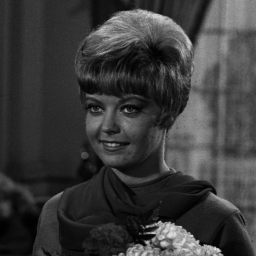

In [131]:
img = cv.imread(f"{path}/Minggu 3/female.tiff")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

## Average Filter

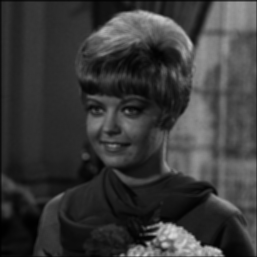

In [132]:
kernel_avg = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

cv2_imshow(convolution2d(img_gray, kernel_avg, 1, 2))

## Low Pass Filter

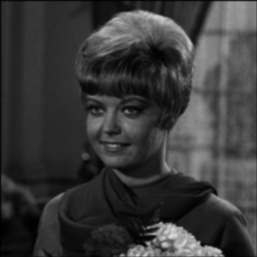

In [133]:
kernel_low = np.array([[1,1,1],[1,4,1],[1,1,1]])/12

cv2_imshow(convolution2d(img_gray, kernel_low, 1, 2))

## High Pass Filter

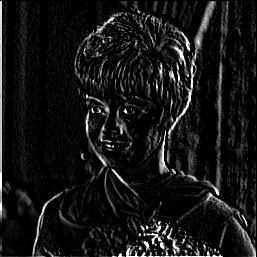

In [134]:
kernel_high = np.array([[-1,0,1],[-1,0,3],[-3,0,1]])

cv2_imshow(convolution2d(img_gray, kernel_high, 1, 2))

## Sharpen

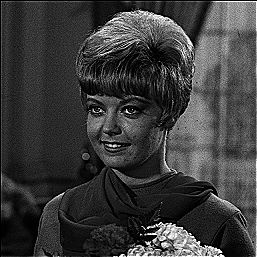

In [135]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

## Emboss

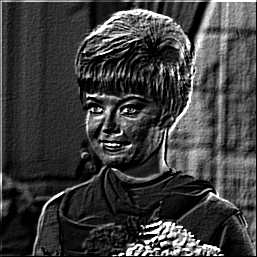

In [136]:
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

## Left Sobel Edge Detection

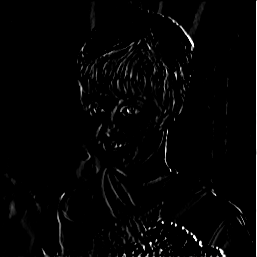

In [137]:
kernel_lsed = np.array([[1,0,-1],[2,0,-2],[1,0,-2]])

cv2_imshow(convolution2d(img_gray, kernel_lsed, 1, 2))

## Canny Edge Detection

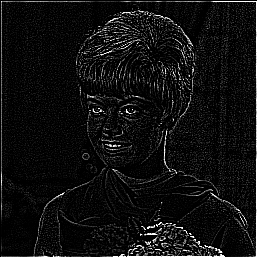

In [138]:
kernel_ced = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_ced, 1, 2))

## Prewitt Edge Detection

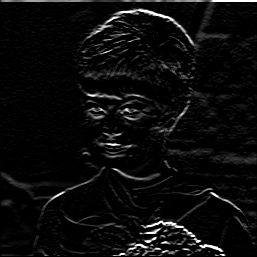

In [139]:
kernel_ped = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_ped, 1, 2))

## 5x5 Gaussian Blur

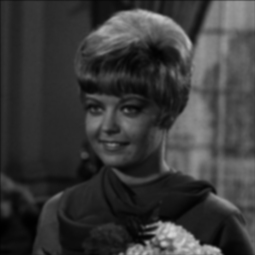

In [140]:
kernel_gauss5 = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256

cv2_imshow(convolution2d(img_gray, kernel_gauss5, 1, 2))

## 21x21 Gaussian Blur

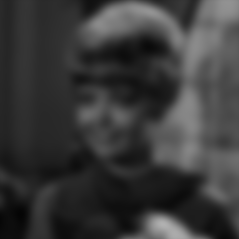

In [141]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
kernel_gaussian = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss21 = kernel_gaussian @ kernel_gaussian.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss21, 1, 2))

# Tugas

Diketahui [dataset KTP](https://drive.google.com/drive/folders/1auQKTV5xIbEtGAWZL-h8GEhRJ0YNpSGI) dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga `histogram equalization` dan operasi aritmatika sebagai teknik pendukung perbaikan citra KTP.